In [970]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline



In [971]:
df = pd.read_excel (r'E:\MatchesRA.xlsx', sheet_name='Sheet1')
df.head()

,tournament_id,game_id,inning,batting_team,bowling_team,over_num,ball_num,stage,bowler,bowler_num,...,LegByes_runs,Byes_runs,Bat_runs,Balls_faced,batsman_id,bowler_id,scoring,boundary,batsman_ball,scoring_id
0,1,1,1,ACCENTURE,ROYAL ENFIELD,1,1,powerplay,Senthil Nathan,1,...,0,0,1,1,1_Suresh,1_Senthil Nathan,strike rotation,NaN,Suresh1,2
1,1,1,1,ACCENTURE,ROYAL ENFIELD,1,2,powerplay,Senthil Nathan,1,...,0,0,0,1,2_Ajay Narayanan,1_Senthil Nathan,dot ball,NaN,AjayNarayanan1,1
2,1,1,1,ACCENTURE,ROYAL ENFIELD,1,3,powerplay,Senthil Nathan,1,...,0,0,4,2,2_Ajay Narayanan,1_Senthil Nathan,boundaries,four,AjayNarayanan2,4
3,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,powerplay,Senthil Nathan,1,...,0,0,0,3,2_Ajay Narayanan,1_Senthil Nathan,dot ball,NaN,AjayNarayanan3,1
4,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,powerplay,Senthil Nathan,1,...,0,0,3,2,1_Suresh,1_Senthil Nathan,aggressive running,NaN,Suresh2,3


In [972]:
df.isnull().sum()

tournament_id        0
game_id              0
inning               0
batting_team         0
bowling_team         0
over_num             0
ball_num             0
stage                0
bowler               0
bowler_num           0
batsman              0
batsman_num          0
howout               0
wide_runs            0
noball               0
noball_bat_runs      0
LegByes_runs         0
Byes_runs            0
Bat_runs             0
Balls_faced          0
batsman_id           0
bowler_id            0
scoring              0
boundary           314
batsman_ball         0
scoring_id           0
dtype: int64

In [973]:
test_df = df

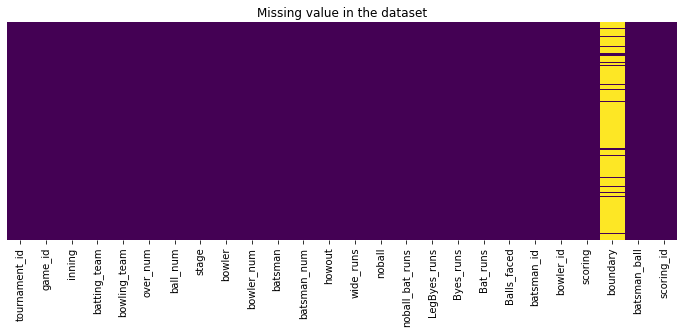

In [974]:
plt.figure(figsize=(12,4))
sns.heatmap(test_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [975]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tournament_id    345 non-null    int64 
 1   game_id          345 non-null    int64 
 2   inning           345 non-null    int64 
 3   batting_team     345 non-null    object
 4   bowling_team     345 non-null    object
 5   over_num         345 non-null    int64 
 6   ball_num         345 non-null    int64 
 7   stage            345 non-null    object
 8   bowler           345 non-null    object
 9   bowler_num       345 non-null    int64 
 10  batsman          345 non-null    object
 11  batsman_num      345 non-null    int64 
 12  howout           345 non-null    object
 13  wide_runs        345 non-null    int64 
 14  noball           345 non-null    int64 
 15  noball_bat_runs  345 non-null    int64 
 16  LegByes_runs     345 non-null    int64 
 17  Byes_runs        345 non-null    in

In [976]:
test_df['boundary'].value_counts()

four    28
six      3
Name: boundary, dtype: int64

In [977]:
test_df=test_df.replace({"boundary":{"six":"6","four":"4",np.nan:0}})

In [978]:
test_df['boundary'] = test_df['boundary'].astype(int)

In [979]:
test_df['stage'].value_counts()

middle       192
powerplay    116
death         37
Name: stage, dtype: int64

In [980]:
test_df=test_df.replace({"stage":{"powerplay":"1","middle":"2","death":"3",np.nan:0}})

In [981]:
test_df['stage'] = test_df['stage'].astype(int)

In [982]:
test_df['wickets'] = test_df['howout']

In [983]:
test_df['wickets'].value_counts()

notout     325
Catch       11
Bowled       4
RunOut       2
LBW          2
Stumped      1
Name: wickets, dtype: int64

In [984]:
test_df=test_df.replace({"wickets":{"notout":"0","Catch":"1","RunOut":"1","Bowled":"1","LBW":"1","Stumped":"1",np.nan:0}})

In [985]:
test_df['wickets'] = test_df['wickets'].astype(int)
test_df['wickets'] = test_df.groupby(['inning'])['wickets'].cumsum()

In [986]:
test_df['howout'].value_counts()

notout     325
Catch       11
Bowled       4
RunOut       2
LBW          2
Stumped      1
Name: howout, dtype: int64

In [987]:
test_df=test_df.replace({"howout":{"notout":"0","Catch":"1","RunOut":"2","Bowled":"3","Stumped":"4","LBW":"5",np.nan:0}})

In [988]:
test_df['howout'] = test_df['howout'].astype(int)

In [989]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tournament_id    345 non-null    int64 
 1   game_id          345 non-null    int64 
 2   inning           345 non-null    int64 
 3   batting_team     345 non-null    object
 4   bowling_team     345 non-null    object
 5   over_num         345 non-null    int64 
 6   ball_num         345 non-null    int64 
 7   stage            345 non-null    int32 
 8   bowler           345 non-null    object
 9   bowler_num       345 non-null    int64 
 10  batsman          345 non-null    object
 11  batsman_num      345 non-null    int64 
 12  howout           345 non-null    int32 
 13  wide_runs        345 non-null    int64 
 14  noball           345 non-null    int64 
 15  noball_bat_runs  345 non-null    int64 
 16  LegByes_runs     345 non-null    int64 
 17  Byes_runs        345 non-null    in

,tournament_id,game_id,inning,batting_team,bowling_team,over_num,ball_num,stage,bowler,bowler_num,...,Byes_runs,Bat_runs,Balls_faced,batsman_id,bowler_id,scoring,boundary,batsman_ball,scoring_id,wickets
0,1,1,1,ACCENTURE,ROYAL ENFIELD,1,1,1,Senthil Nathan,1,...,0,1,1,1_Suresh,1_Senthil Nathan,strike rotation,0,Suresh1,2,0
1,1,1,1,ACCENTURE,ROYAL ENFIELD,1,2,1,Senthil Nathan,1,...,0,0,1,2_Ajay Narayanan,1_Senthil Nathan,dot ball,0,AjayNarayanan1,1,0
2,1,1,1,ACCENTURE,ROYAL ENFIELD,1,3,1,Senthil Nathan,1,...,0,4,2,2_Ajay Narayanan,1_Senthil Nathan,boundaries,4,AjayNarayanan2,4,0
3,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,1,Senthil Nathan,1,...,0,0,3,2_Ajay Narayanan,1_Senthil Nathan,dot ball,0,AjayNarayanan3,1,0
4,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,1,Senthil Nathan,1,...,0,3,2,1_Suresh,1_Senthil Nathan,aggressive running,0,Suresh2,3,0


In [990]:
test_df["Overs"] = test_df['over_num'].map(str) + '.' + test_df['ball_num'].map(str)

In [991]:
test_df['Overs'] = test_df['Overs'].astype(float)

In [992]:
test_df['run'] = test_df['wide_runs']+test_df['noball']+test_df['Byes_runs']+test_df['Bat_runs']+test_df['LegByes_runs']
test_df['runs'] = test_df.groupby(['inning'])['run'].cumsum()
#test_df['rr_ov_inn'] =  test_df['inning'].map(str) + '.' + test_df['Overs'].map(str)

In [993]:
test_df['ball_counts'] = df.groupby('inning').cumcount()+1
test_df.insert(0, 'tot_ball', range(1, 1 + len(test_df)))

test_df['tot_ball']

0        1
1        2
2        3
3        4
4        5
      ... 
340    341
341    342
342    343
343    344
344    345
Name: tot_ball, Length: 345, dtype: int64

In [994]:
#test_df['runrate']=test_df['run'].mean()
#test_df['runrate']=test_df.groupby(['inning'])['runs'].mean()
test_df['runrate_ball'] = 10 * test_df['runs'] / test_df['ball_counts'].count() #each ball runrate
#test_df['NRR'] =  test_df.groupby(['inning'])['runrate_ball'].cumsum()
df = test_df.groupby('inning')['runrate_ball'].last() 
df1 = df[1] - df[2]
df1 # Net Run Rate
test_df.count()

tot_ball           345
tournament_id      345
game_id            345
inning             345
batting_team       345
bowling_team       345
over_num           345
ball_num           345
stage              345
bowler             345
bowler_num         345
batsman            345
batsman_num        345
howout             345
wide_runs          345
noball             345
noball_bat_runs    345
LegByes_runs       345
Byes_runs          345
Bat_runs           345
Balls_faced        345
batsman_id         345
bowler_id          345
scoring            345
boundary           345
batsman_ball       345
scoring_id         345
wickets            345
Overs              345
run                345
runs               345
ball_counts        345
runrate_ball       345
dtype: int64

In [995]:
test_df.head(192)

,tot_ball,tournament_id,game_id,inning,batting_team,bowling_team,over_num,ball_num,stage,bowler,...,scoring,boundary,batsman_ball,scoring_id,wickets,Overs,run,runs,ball_counts,runrate_ball
0,1,1,1,1,ACCENTURE,ROYAL ENFIELD,1,1,1,Senthil Nathan,...,strike rotation,0,Suresh1,2,0,1.1,1,1,1,0.028986
1,2,1,1,1,ACCENTURE,ROYAL ENFIELD,1,2,1,Senthil Nathan,...,dot ball,0,AjayNarayanan1,1,0,1.2,0,1,2,0.028986
2,3,1,1,1,ACCENTURE,ROYAL ENFIELD,1,3,1,Senthil Nathan,...,boundaries,4,AjayNarayanan2,4,0,1.3,4,5,3,0.144928
3,4,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,1,Senthil Nathan,...,dot ball,0,AjayNarayanan3,1,0,1.4,2,7,4,0.202899
4,5,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,1,Senthil Nathan,...,aggressive running,0,Suresh2,3,0,1.4,3,10,5,0.289855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,1,1,1,ACCENTURE,ROYAL ENFIELD,30,2,3,Navaneetha Krishnan,...,strike rotation,0,Shriram4,2,9,30.2,1,198,188,5.739130
188,189,1,1,1,ACCENTURE,ROYAL ENFIELD,30,3,3,Navaneetha Krishnan,...,aggressive running,0,Parthiban2,3,9,30.3,2,200,189,5.797101
189,190,1,1,1,ACCENTURE,ROYAL ENFIELD,30,4,3,Navaneetha Krishnan,...,dot ball,0,Parthiban3,1,9,30.4,0,200,190,5.797101
190,191,1,1,1,ACCENTURE,ROYAL ENFIELD,30,5,3,Navaneetha Krishnan,...,dot ball,0,Parthiban4,1,10,30.5,0,200,191,5.797101


In [996]:
columns_to_remove = ['tournament_id', 'game_id', 'inning', 'bowler','batsman','batsman_id','bowler_id','scoring','batsman_ball']
test_df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [997]:
test_df.head(100)

,tot_ball,batting_team,bowling_team,over_num,ball_num,stage,bowler_num,batsman_num,howout,wide_runs,...,Bat_runs,Balls_faced,boundary,scoring_id,wickets,Overs,run,runs,ball_counts,runrate_ball
0,1,ACCENTURE,ROYAL ENFIELD,1,1,1,1,1,0,0,...,1,1,0,2,0,1.1,1,1,1,0.028986
1,2,ACCENTURE,ROYAL ENFIELD,1,2,1,1,2,0,0,...,0,1,0,1,0,1.2,0,1,2,0.028986
2,3,ACCENTURE,ROYAL ENFIELD,1,3,1,1,2,0,0,...,4,2,4,4,0,1.3,4,5,3,0.144928
3,4,ACCENTURE,ROYAL ENFIELD,1,4,1,1,2,0,2,...,0,3,0,1,0,1.4,2,7,4,0.202899
4,5,ACCENTURE,ROYAL ENFIELD,1,4,1,1,1,0,0,...,3,2,0,3,0,1.4,3,10,5,0.289855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,ACCENTURE,ROYAL ENFIELD,15,3,2,5,6,0,0,...,0,1,0,1,3,15.3,0,114,96,3.304348
96,97,ACCENTURE,ROYAL ENFIELD,15,4,2,5,6,0,0,...,0,2,0,1,3,15.4,0,114,97,3.304348
97,98,ACCENTURE,ROYAL ENFIELD,15,5,2,5,6,0,0,...,0,3,0,1,3,15.5,0,114,98,3.304348
98,99,ACCENTURE,ROYAL ENFIELD,15,6,2,5,6,0,0,...,4,4,4,4,3,15.6,4,118,99,3.420290


In [998]:
# saving the dataframe
#test_df.to_csv(r'E:Flask_dataset\updatedFile1.csv',index=False)

In [999]:
pred_df = test_df

In [1000]:
pred_df.columns

Index(['tot_ball', 'batting_team', 'bowling_team', 'over_num', 'ball_num',
       'stage', 'bowler_num', 'batsman_num', 'howout', 'wide_runs', 'noball',
       'noball_bat_runs', 'LegByes_runs', 'Byes_runs', 'Bat_runs',
       'Balls_faced', 'boundary', 'scoring_id', 'wickets', 'Overs', 'run',
       'runs', 'ball_counts', 'runrate_ball'],
      dtype='object')

In [1001]:
pred_df = pred_df[['batting_team', 'bowling_team','wickets', 'Overs', 'runs','runrate_ball']]

In [1002]:
# Removing the first 5 overs data in every match
#df = pred_df[pred_df['Overs']>=5.0]
df = pred_df

In [1003]:
df.head()

,batting_team,bowling_team,wickets,Overs,runs,runrate_ball
0,ACCENTURE,ROYAL ENFIELD,0,1.1,1,0.028986
1,ACCENTURE,ROYAL ENFIELD,0,1.2,1,0.028986
2,ACCENTURE,ROYAL ENFIELD,0,1.3,5,0.144928
3,ACCENTURE,ROYAL ENFIELD,0,1.4,7,0.202899
4,ACCENTURE,ROYAL ENFIELD,0,1.4,10,0.289855


In [1004]:
encoded_df = pd.get_dummies(data=df, columns=['batting_team', 'bowling_team'])

In [1005]:
encoded_df.head()

,wickets,Overs,runs,runrate_ball,batting_team_ACCENTURE,batting_team_ROYAL ENFIELD,bowling_team_ACCENTURE,bowling_team_ROYAL ENFIELD
0,0,1.1,1,0.028986,1,0,0,1
1,0,1.2,1,0.028986,1,0,0,1
2,0,1.3,5,0.144928,1,0,0,1
3,0,1.4,7,0.202899,1,0,0,1
4,0,1.4,10,0.289855,1,0,0,1


In [1006]:
encoded_df.columns

Index(['wickets', 'Overs', 'runs', 'runrate_ball', 'batting_team_ACCENTURE ',
       'batting_team_ROYAL ENFIELD', 'bowling_team_ACCENTURE ',
       'bowling_team_ROYAL ENFIELD'],
      dtype='object')

In [1007]:
encoded_df=encoded_df[['batting_team_ACCENTURE ',
       'batting_team_ROYAL ENFIELD', 'bowling_team_ACCENTURE ',
       'bowling_team_ROYAL ENFIELD','Overs','wickets', 'runs','runrate_ball']]

In [1008]:
encoded_df.head()

,batting_team_ACCENTURE,batting_team_ROYAL ENFIELD,bowling_team_ACCENTURE,bowling_team_ROYAL ENFIELD,Overs,wickets,runs,runrate_ball
0,1,0,0,1,1.1,0,1,0.028986
1,1,0,0,1,1.2,0,1,0.028986
2,1,0,0,1,1.3,0,5,0.144928
3,1,0,0,1,1.4,0,7,0.202899
4,1,0,0,1,1.4,0,10,0.289855


In [1009]:
# saving the dataframe
#encoded_df.to_csv(r'E:Flask_dataset\updatedFile2.csv',index=False)

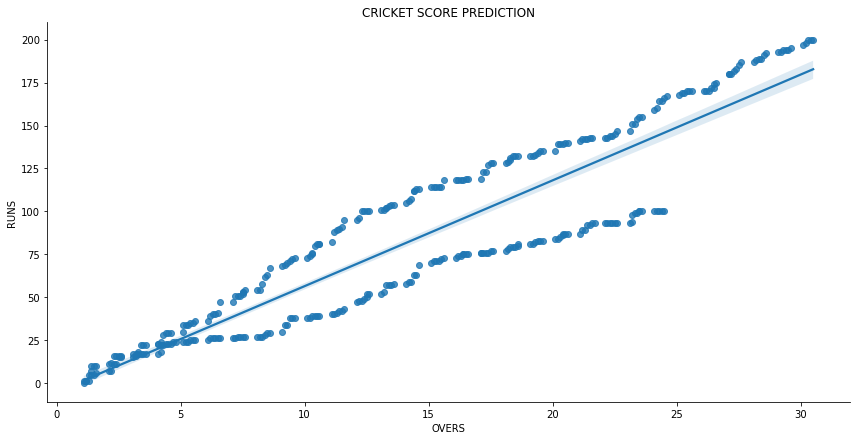

In [1010]:
sns.lmplot(x='Overs',y='runs',data=df,aspect=2,height=6)
plt.xlabel('OVERS')
plt.ylabel('RUNS')
plt.title('CRICKET SCORE PREDICTION');

In [1011]:
encoded_df.describe()

,batting_team_ACCENTURE,batting_team_ROYAL ENFIELD,bowling_team_ACCENTURE,bowling_team_ROYAL ENFIELD,Overs,wickets,runs,runrate_ball
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,0.553623,0.446377,0.446377,0.553623,14.380870,3.701449,83.452174,2.418904
std,0.497838,0.497838,0.497838,0.497838,8.021917,2.773551,53.741183,1.557715
min,0.000000,0.000000,0.000000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.500000,1.000000,36.000000,1.043478
50%,1.000000,0.000000,0.000000,1.000000,14.300000,3.000000,78.000000,2.260870
75%,1.000000,1.000000,1.000000,1.000000,21.100000,6.000000,119.000000,3.449275
max,1.000000,1.000000,1.000000,1.000000,30.500000,10.000000,200.000000,5.797101


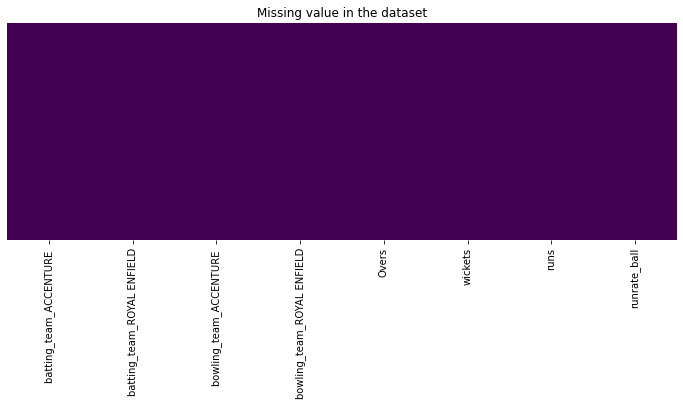

In [1012]:
plt.figure(figsize=(12,4))
sns.heatmap(encoded_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

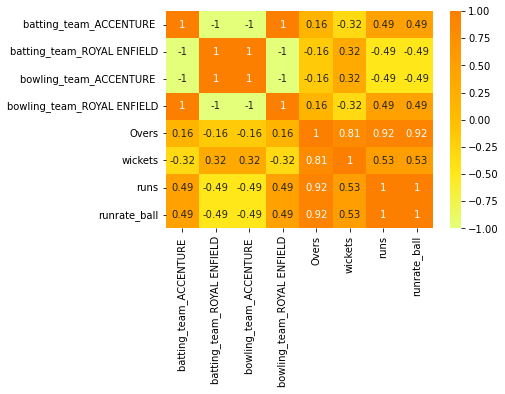

In [1013]:
# correlation plot
corr = encoded_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [1014]:
from sklearn.model_selection import train_test_split
X = encoded_df.drop(['runs','runrate_ball'],axis=1) # Independet variable
y = encoded_df[['runs','runrate_ball']] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [1015]:
type(X_test)

pandas.core.frame.DataFrame

In [1016]:
type(y)


pandas.core.frame.DataFrame

In [1017]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [1018]:
regressor.predict(X_test)[0]

array([20.98100075,  0.60814495])

In [1019]:
X_test.head()

,batting_team_ACCENTURE,batting_team_ROYAL ENFIELD,bowling_team_ACCENTURE,bowling_team_ROYAL ENFIELD,Overs,wickets
225,0,1,1,0,6.2,2
195,0,1,1,0,1.5,0
259,0,1,1,0,11.6,5
14,1,0,0,1,3.2,1
134,1,0,0,1,21.5,4


In [1020]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 225 to 238
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   runs          104 non-null    int64  
 1   runrate_ball  104 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [1021]:
regressor.predict([[0,1,1,0,21.5,4]])

array([[130.00443609,   3.76824452]])

In [1022]:
regressor.predict([[0,1,1,0,50.0,10]])

array([[314.86031261,   9.12638587]])

In [1023]:
len(X_test)

104

In [1024]:
regressor.score(X_test,y_test)

0.980811469237031

In [1025]:
X_train


,batting_team_ACCENTURE,batting_team_ROYAL ENFIELD,bowling_team_ACCENTURE,bowling_team_ROYAL ENFIELD,Overs,wickets
311,0,1,1,0,19.6,8
147,1,0,0,1,23.6,4
135,1,0,0,1,21.6,4
163,1,0,0,1,26.4,5
165,1,0,0,1,26.5,6
...,...,...,...,...,...,...
237,0,1,1,0,8.2,3
31,1,0,0,1,5.5,1
40,1,0,0,1,7.2,1
230,0,1,1,0,7.1,3


In [1026]:
# Creating a pickle file for the classifier
#filename = 'predictionFinal.pkl'
#pickle.dump(regressor, open(filename, 'wb'))